<a href="https://colab.research.google.com/github/anasabbad/anasabbad/blob/main/Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as :
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.stats import uniform
%matplotlib inline

In [ ]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing Dataset
df=pd.read_csv('/content/drive/MyDrive/pandas/Airbnb NYC 2019.csv')

**DataSet Inspection**

In [ ]:
# First look
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

Given file has 48895 rows and 16 columns

In [ ]:
df.size

782320

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Contains both categorical and numerical variables

In [ ]:
# Analysing the numerical columns
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000



Maximum price for the room is $10000 & the minimum price is 0,which means that may be  some rooms are available at free of cost or there may be chance of missing values, but we are proceeding with assumption that some rooms are avaialbe for free. Median price of the listing is 106,that means fifty percentage of the listings are avaialble below 106.

The mean price of the room is $152 with SD 240,The high deviation from the mean price indicates for the presence of outliers, hence distribution is right skewed

The IQR of room price is between  69and 175.

The mean number of nights to be booked for a room is 7 .

The max and min of the minimum nights of required for the booking is 1250 and 1 respectively

The maximum number of reviews available for a listing is 629 and the minimum of zero and with mean number of 23 reviews and with a median of 5 reviews

The maximum number of listings owned by a single host is 327.

Fifty percentage of the listings have the availabilty of rooms less than 45 days in a year. The mean number of availaibilty of rooms in a year is 112 days.

In [ ]:
df.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [ ]:
# Looking through all the column names
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

**Missing Data**

In [ ]:
# find the total missing values in each column
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

16 Missing values in the name ,21 in host_name,10052 each in last_review and reviews_per_month.

In [ ]:
df.isnull().count()

id                                48895
name                              48895
host_id                           48895
host_name                         48895
neighbourhood_group               48895
neighbourhood                     48895
latitude                          48895
longitude                         48895
room_type                         48895
price                             48895
minimum_nights                    48895
number_of_reviews                 48895
last_review                       48895
reviews_per_month                 48895
calculated_host_listings_count    48895
availability_365                  48895
dtype: int64

In [ ]:
total=df.isnull().sum().sort_values(ascending=False)
percent=((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [ ]:
missing_data

,Total,Percent
last_review,10052,20.558339
reviews_per_month,10052,20.558339
host_name,21,0.042949
name,16,0.032723
id,0,0.000000
host_id,0,0.000000
neighbourhood_group,0,0.000000
neighbourhood,0,0.000000
latitude,0,0.000000
longitude,0,0.000000


In [ ]:
# Droping the columns which are not that relevent
# dropping host_name considering the privacy
df.drop(['host_name','last_review'],axis=1,inplace=True)



In [ ]:
# Replacing missinng name with name not given
df["name"].fillna("Name not given", inplace = True)

In [ ]:
# Replace the missing values in reviews_per_month with zero
df["reviews_per_month"].fillna(0, inplace = True)

In [ ]:
# Examining the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   neighbourhood_group             48895 non-null  object 
 4   neighbourhood                   48895 non-null  object 
 5   latitude                        48895 non-null  float64
 6   longitude                       48895 non-null  float64
 7   room_type                       48895 non-null  object 
 8   price                           48895 non-null  int64  
 9   minimum_nights                  48895 non-null  int64  
 10  number_of_reviews               48895 non-null  int64  
 11  reviews_per_month               48895 non-null  float64
 12  calculated_host_listings_count  

In [ ]:

df.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


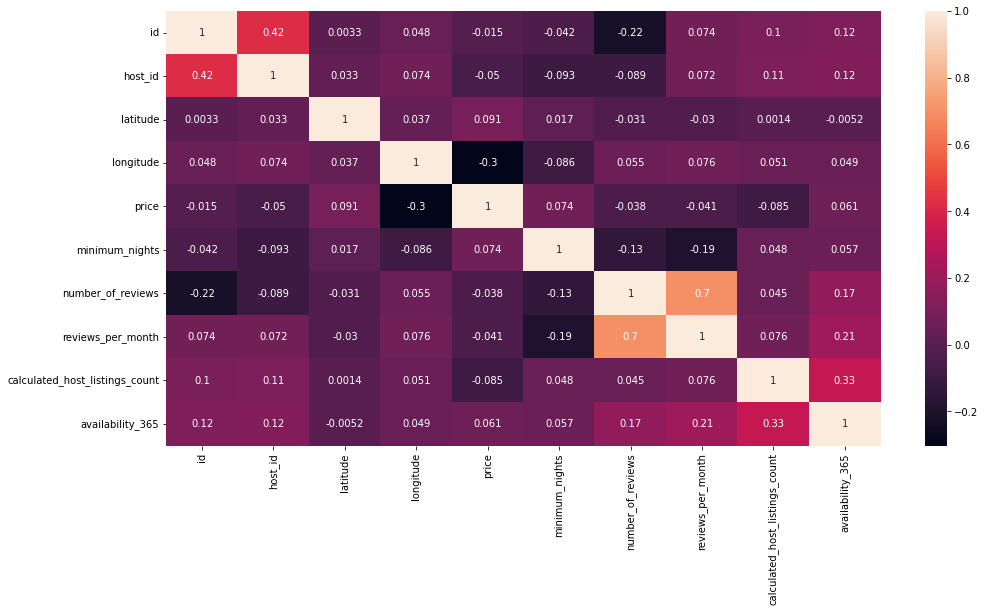

In [ ]:
# Checking the correltion between all variables
corr = df.corr(method='kendall')
plt.figure(figsize=(16,8))
sns.heatmap(corr, annot=True)


There is no such relevant correlation among different features except for "number of reviews" and "reviews per month".

In [ ]:
# Finding  the unique  neighborhood groups
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'neighbourhood group')

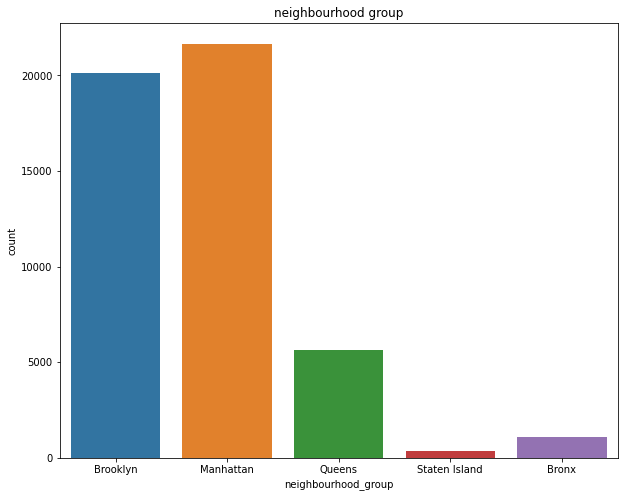

In [ ]:
# Find the neighbourhood_group type counts
sns.countplot(df['neighbourhood_group'] )
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.title('neighbourhood group')

Text(0.5, 0, 'Location')

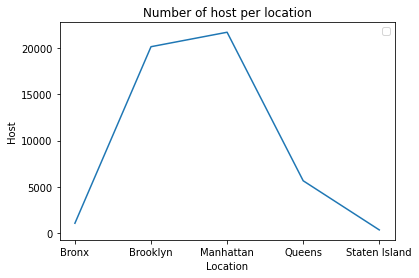

In [ ]:
#Variation of host in each location
plt.legend(labels = ['No. of Host'])
plt.plot(df.groupby('neighbourhood_group')['host_id'].count())
plt.title('Number of host per location')
plt.ylabel('Host')
plt.xlabel('Location')

There are five unique neighbourhood groups.\
Manhattan has most number of listings.\
Staten Island has least number of listings

In [ ]:
# finding the roomtypes
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

There are three types of rooms

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Room Type')

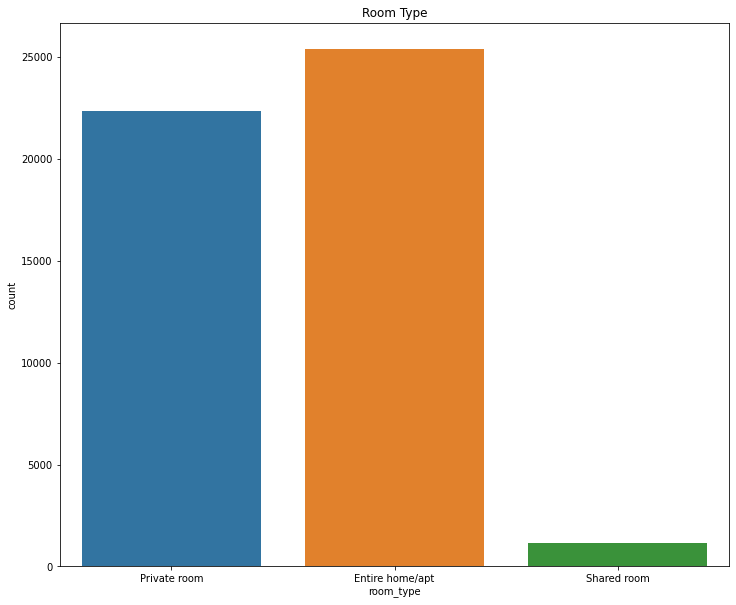

In [ ]:
# Find the differernt room type counts
sns.countplot(df['room_type'] )
fig = plt.gcf()
fig.set_size_inches(12,10)
plt.title('Room Type')


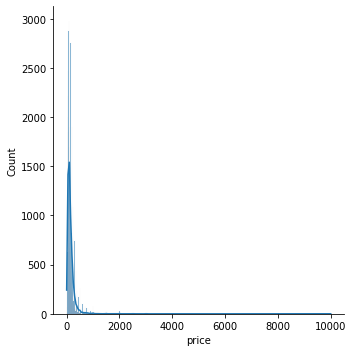

In [ ]:
# Ditribution of price
sns.displot(df['price'], kde=True)

The right skewness in the graph indicates the presence of outliers.

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


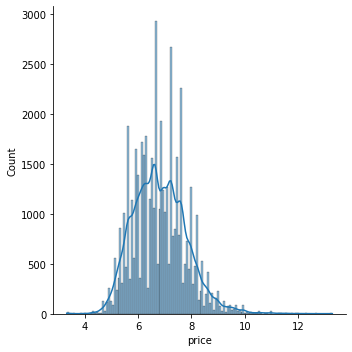

In [ ]:
# Log plot of price
sns.displot(np.log2(df['price']), kde=True)

Log of price follows normal distribution with mean 152

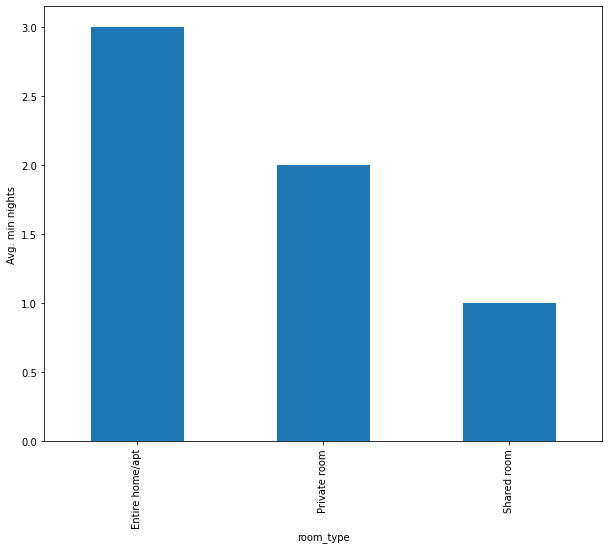

In [ ]:
# Average number of minimum nights of stay in each room type
df.groupby('room_type').minimum_nights.median().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. min nights')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

shared rooms are moslty  prefered for single night stays

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Neighbourhood')

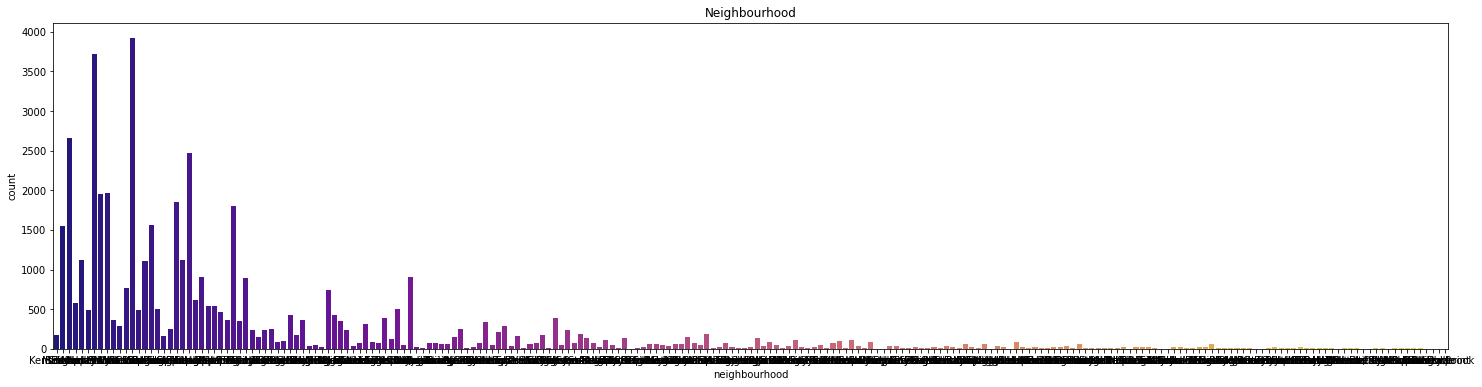

In [ ]:
# Finding Top neighbour hoods
sns.countplot(df['neighbourhood'], palette="plasma")
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')


,neighbourhood,count
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971
5,Hell's Kitchen,1958
6,East Village,1853
7,Upper East Side,1798
8,Crown Heights,1564
9,Midtown,1545


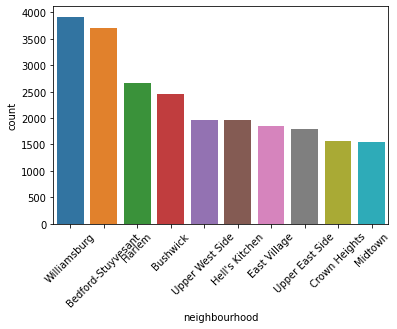

In [ ]:
top_neighbourhoods=df['neighbourhood'].value_counts().sort_values(ascending=False).reset_index().head(10)
top_neighbourhoods.columns=['neighbourhood','count']
my_plot=sns.barplot(x='neighbourhood',y='count',data=top_neighbourhoods)
my_plot.set_xticklabels(my_plot.get_xticklabels(),rotation=45)
top_neighbourhoods

The maximum number of listings are in Williamsburg

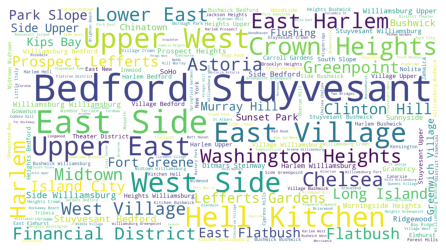

In [ ]:
# Displaying the main neighbourhoods
from wordcloud import WordCloud
words=" ".join(df.neighbourhood)  # joining the words in neighbour hood
wordcloud = WordCloud(
                          background_color='white',
                          width=2200,
                          height=1200
                         ).generate(words)
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
# host with highes count
top_host=df['host_id'].value_counts().head(10).reset_index()
top_host.columns=['host_id','listing_count']
top_host


,host_id,listing_count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,16098958,96
5,12243051,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

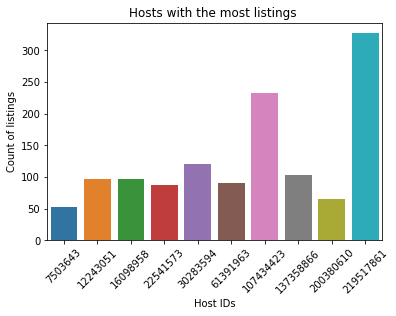

In [ ]:
# Plot the top 10 hosts
host_plot=sns.barplot(x='host_id',y='listing_count',data=top_host)
host_plot.set_title('Hosts with the most listings ')
host_plot.set_ylabel('Count of listings')
host_plot.set_xlabel('Host IDs')
host_plot.set_xticklabels(host_plot.get_xticklabels(), rotation=45)

In [ ]:
# Host with max listing
top_host.max()

host_id          219517861
listing_count          327
dtype: int64

In [ ]:
# cross verifying above result with given countlisting data
df.calculated_host_listings_count.max()

327

The host with 'Host ID' 219517861 has the most number of listings with total number 327

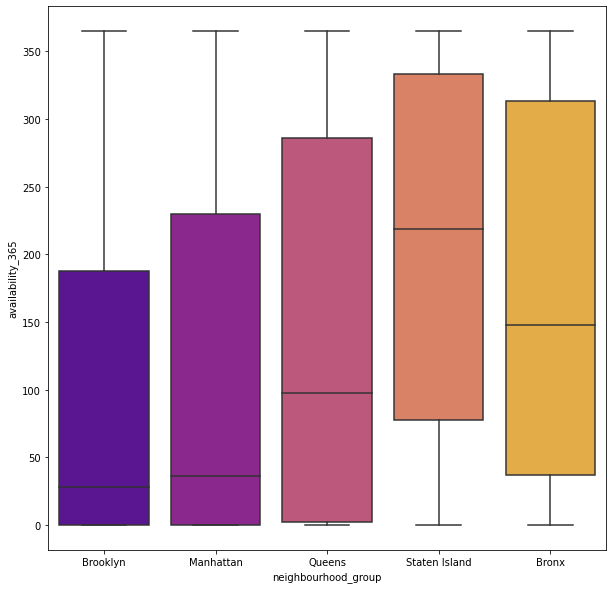

In [ ]:
# Relation between neighbourhood and availability
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365',palette='plasma')

The rooms in Manhattan and Brooklyn are leat available.\
The listings in Staten Island are available most of the time


In [ ]:
# Median availibility of each room type
df.groupby('room_type')['availability_365'].median()

room_type
Entire home/apt    42.0
Private room       45.0
Shared room        90.0
Name: availability_365, dtype: float64

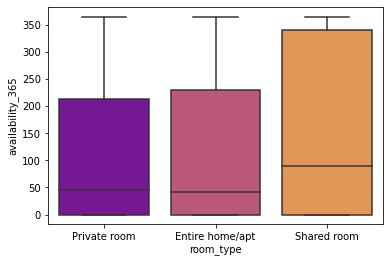

In [ ]:
# plot median avalibilty in each room type
ax = sns.boxplot(data=df, x='room_type',y='availability_365',palette='plasma')

Private rooms and Apartments are most prefered one.

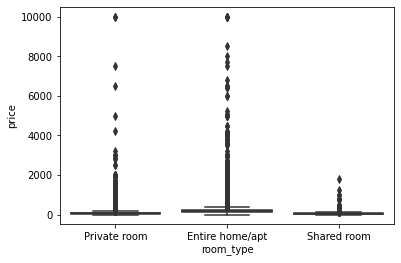

In [ ]:
# Box plot of price vs room type
ax = sns.boxplot(data=df, x='room_type',y='price',palette='plasma')

There are presence of outliers

In [ ]:
# Find the median price of each room type
df.groupby('room_type').price.median()

room_type
Entire home/apt    160.0
Private room        70.0
Shared room         45.0
Name: price, dtype: float64

In [ ]:
# Find the mean price of each room type
df.groupby('room_type').price.mean()

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

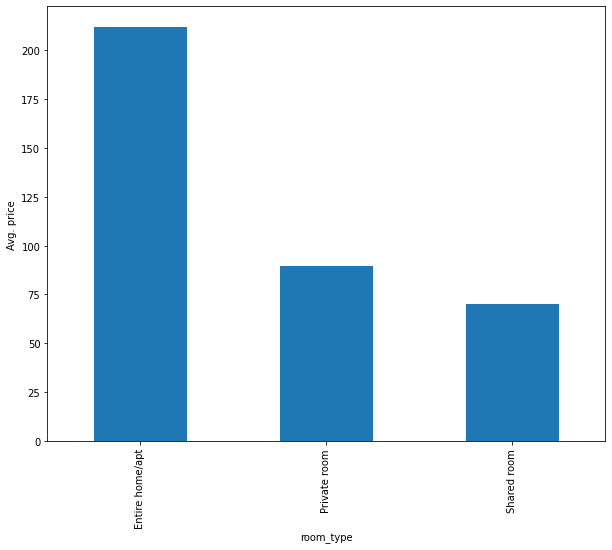

In [ ]:
# plot price in each room type
df.groupby('room_type').price.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. price')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

Price is highet for Apartment\
Price is lowest for shared rooms

In [ ]:
# Find the mean-price in each neighbour hood group
df.groupby('neighbourhood_group').price.mean()

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

In [ ]:
# Find the median-price in each neighbour hood group
df.groupby('neighbourhood_group').price.median()

neighbourhood_group
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64

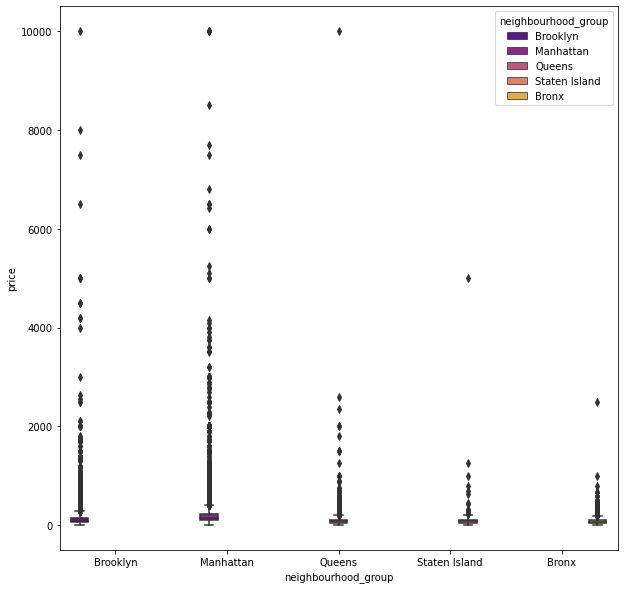

In [ ]:
# find relation between price and neighbour hood
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='price',palette='plasma',hue='neighbourhood_group')

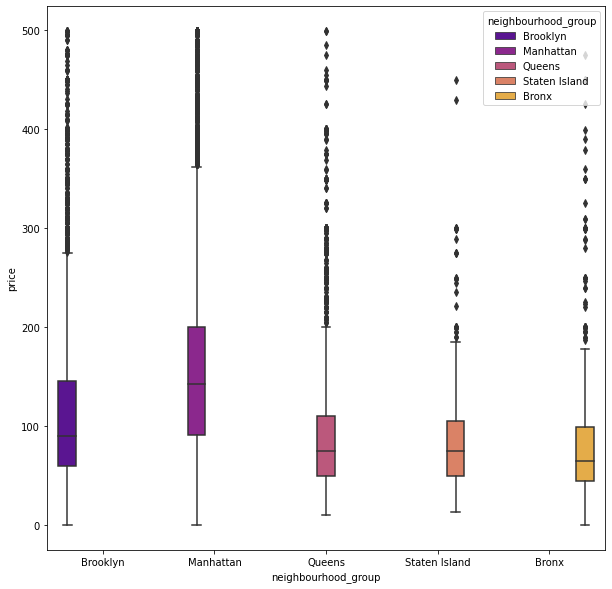

In [ ]:
# Removing the outliers which has a price over 500
plt.figure(figsize=(10,10))
df2=df[df['price']<500]
ax = sns.boxplot(data=df2, x='neighbourhood_group',y='price',palette='plasma',hue='neighbourhood_group')

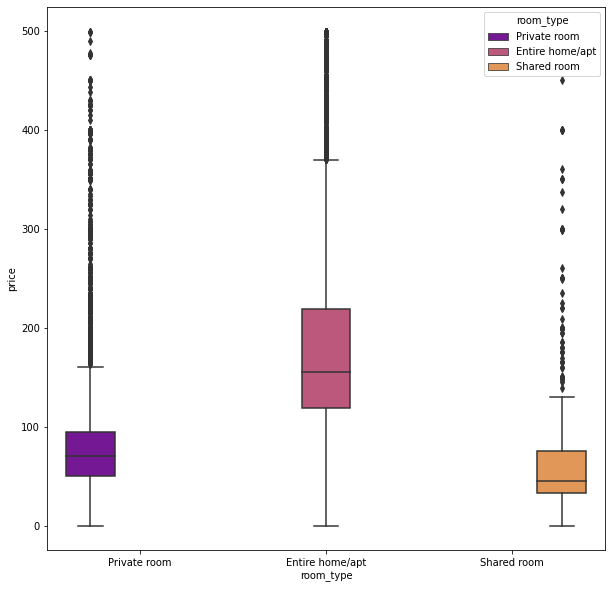

In [ ]:
# comparing the price of each room type
df2=df[df['price']<500]
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df2, x='room_type',y='price',palette='plasma',hue='room_type')

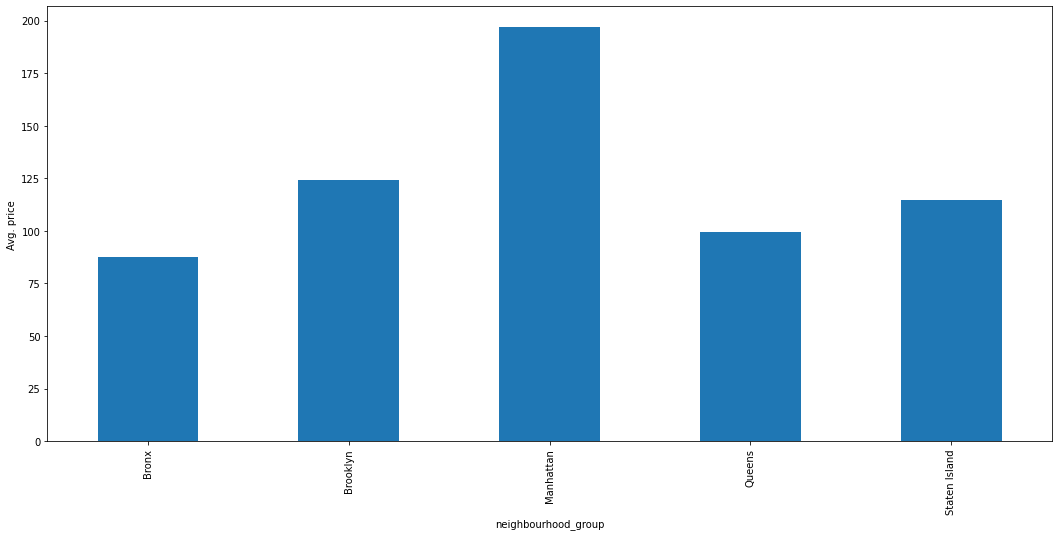

In [ ]:
# plot the mean price in each neighbour hood group
df.groupby('neighbourhood_group').price.mean().plot(kind='bar',figsize=(18,8))
plt.ylabel('Avg. price')
plt.show()

Text(0.5, 0, 'Location')

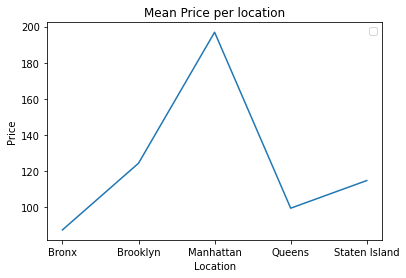

In [ ]:
#Variation of host in each location
plt.legend(labels = ['Price'])
plt.plot(df.groupby('neighbourhood_group').price.mean())
plt.title('Mean Price per location')
plt.ylabel('Price')
plt.xlabel('Location')

Listings in Manhattan has the highest price.\
properties listed in Queens has the lowest price

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


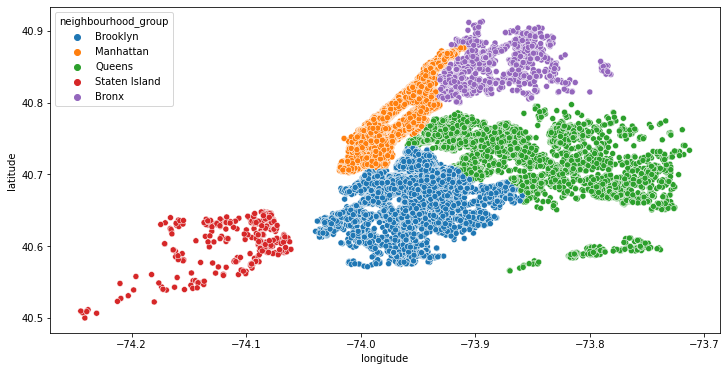

In [ ]:
# map of neighbour hoods groups
plt.figure(figsize=(12,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

In [ ]:
# neighbour hoods map
plt.figure(figsize=(12,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood)
plt.ioff()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


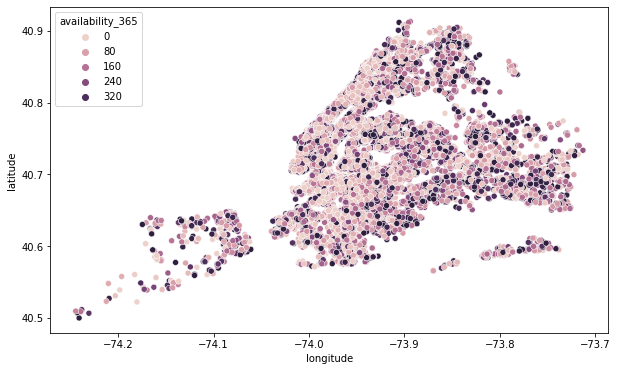

In [ ]:
# availibility of nieghbour hoods
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.availability_365)
plt.ioff()

In [ ]:
# Distribution of room types in each neighbor hood groups
room_dist=df.groupby(['neighbourhood_group','room_type'])['room_type'].count().unstack()



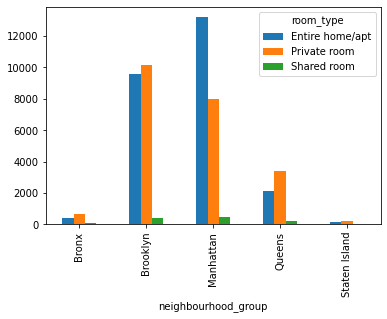

In [ ]:
room_dist.plot(kind='bar')

In [ ]:
# Finding the distribution of room_types s in each neighbour hood group
area_host_roomtype=df.groupby(['neighbourhood_group','room_type'])['host_id'].count().reset_index().rename({'host_id':'host_number'},axis='columns')
area_host_roomtype

,neighbourhood_group,room_type,host_number
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


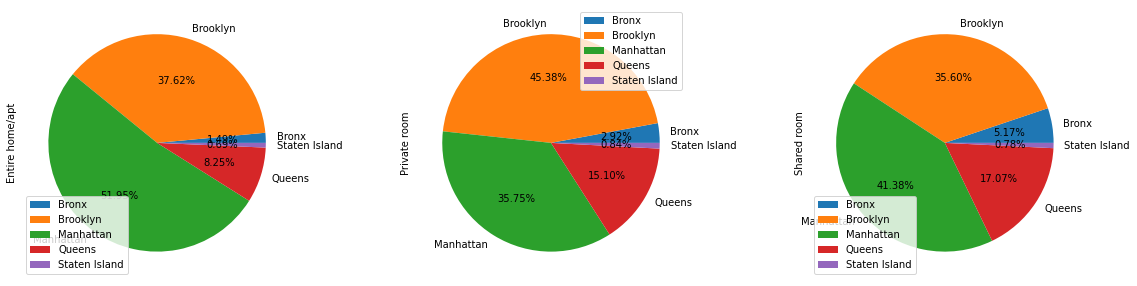

In [ ]:
# Percentage of each room types in neighbourhood groups
plot=room_dist.plot(kind='pie',subplots=True,figsize=(20,5),autopct='%1.2f%%')

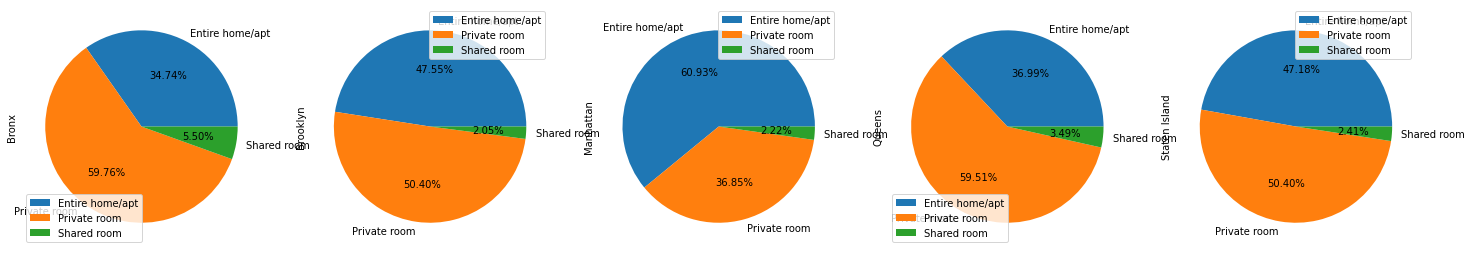

In [ ]:
# room distribution in each nieghbour hood area
room_dist2=room_dist.T
plot=room_dist2.plot(kind='pie',subplots=True,figsize=(25,15),autopct='%1.2f%%')


In [ ]:
# Finding  the neighborhood belongs to each neighborhood area
neighbourhood_in_neghbourhoodarea=pd.DataFrame(df.groupby('neighbourhood_group')['neighbourhood'].unique()).reset_index()

In [ ]:
neighbourhood_in_neghbourhoodarea

,neighbourhood_group,neighbourhood
0,Bronx,"[Highbridge, Clason Point, Eastchester, Kingsb..."
1,Brooklyn,"[Kensington, Clinton Hill, Bedford-Stuyvesant,..."
2,Manhattan,"[Midtown, Harlem, East Harlem, Murray Hill, He..."
3,Queens,"[Long Island City, Woodside, Flushing, Sunnysi..."
4,Staten Island,"[St. George, Tompkinsville, Emerson Hill, Shor..."


There are a total of five  different neighbourhood groups  

In [ ]:
# Finding the count of neighbour hood in each neighbour hoof group
def neighbour_count(neighbors):
  return len(neighbors)
neighbourhood_in_neghbourhoodarea['number of neighbourhood']=neighbourhood_in_neghbourhoodarea['neighbourhood'].apply(neighbour_count)
neighbourhood_in_neghbourhoodarea

,neighbourhood_group,neighbourhood,number of neighbourhood
0,Bronx,"[Highbridge, Clason Point, Eastchester, Kingsb...",48
1,Brooklyn,"[Kensington, Clinton Hill, Bedford-Stuyvesant,...",47
2,Manhattan,"[Midtown, Harlem, East Harlem, Murray Hill, He...",32
3,Queens,"[Long Island City, Woodside, Flushing, Sunnysi...",51
4,Staten Island,"[St. George, Tompkinsville, Emerson Hill, Shor...",43


<Figure size 720x720 with 0 Axes>

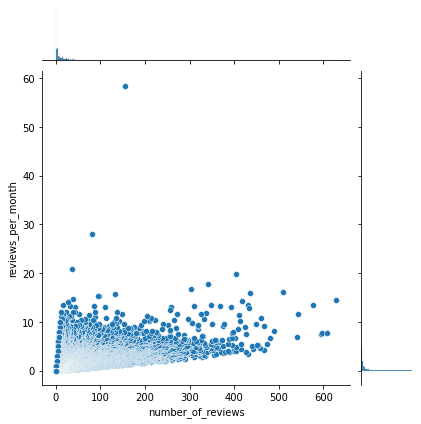

In [ ]:
# FInd the relationship between reviews per month and number of reviews
plt.figure(figsize=(10,10))
ax = sns.jointplot(data=df2,x='number_of_reviews',y='reviews_per_month',palette='plasma')

Hill side hotel in Queens is the most listed Hotel

In [ ]:
# Find the MINIMUM,MAXIMUM,MEAN,MEDIAN price of each roomtype in every neighbourhood group
df.groupby(['neighbourhood_group','room_type']).agg({'price':['min','max','mean','median']}).reset_index()

neighbourhood_group        room_type price                          
                                          min    max        mean median
0                Bronx  Entire home/apt    28   1000  127.506596  100.0
1                Bronx     Private room     0   2500   66.788344   53.5
2                Bronx      Shared room    20    800   59.800000   40.0
3             Brooklyn  Entire home/apt     0  10000  178.327545  145.0
4             Brooklyn     Private room     0   7500   76.500099   65.0
5             Brooklyn      Shared room     0    725   50.527845   36.0
6            Manhattan  Entire home/apt     0  10000  249.239109  191.0
7            Manhattan     Private room    10   9999  116.776622   90.0
8            Manhattan      Shared room    10   1000   88.977083   69.0
9               Queens  Entire home/apt    10   2600  147.050573  120.0
10              Queens     Private room    10  10000   71.762456   60.0
11              Queens      Shared room    11   1800   69.020202   37.0
12       Staten Island  Entire home/apt    48   5000  173.846591  100.0
13       Staten Island     Private room    20    300   62.292553   50.0
14       Staten Island      Shared room    13    150   57.444444   30.0

In [ ]:
df[['name','host_id','neighbourhood_group','minimum_nights','reviews_per_month','availability_365','price']].sort_values(by='reviews_per_month',ascending=False).head(20)

,name,host_id,neighbourhood_group,minimum_nights,reviews_per_month,availability_365,price
42075,Enjoy great views of the City in our Deluxe Room!,244361589,Manhattan,1,58.50,299,100
42076,Great Room in the heart of Times Square!,244361589,Manhattan,1,27.95,299,199
38870,Lou's Palace-So much for so little,228415932,Queens,1,20.94,134,45
27287,JFK Comfort.5 Mins from JFK Private Bedroom & ...,156684502,Queens,1,19.75,26,80
28651,JFK 2 Comfort 5 Mins from JFK Private Bedroom,156684502,Queens,1,17.82,25,50
29628,JFK 3 Comfort 5 Mins from JFK Private Bedroom,156684502,Queens,1,16.81,26,50
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,1,16.22,341,48
22469,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Queens,1,16.03,337,48
36238,“For Heaven Cakes”,217379941,Queens,1,15.78,28,75
40297,Studio Apartment 6 minutes from JFK Airport,232251881,Queens,1,15.32,145,67


**CONCLUSIONS**\
1.Manhattan is the busiest area out of the total five neighbour hoods,due to the following reasons \
  a.Most of the hostel listed are in Manhattan\
  b.Average Price for rooms is highest in Manhattan \
  c.Availability of rooms is lowest in Manhattan\
2.The host with host id '219517861' is the busiest as it has the most number of listings (327)
3.Staten Island is the neighbour hood group with least number of listing
4.Most people prefer either private room or apartments.
5.People prefer shared rooms for one night stays
6.Manhattan and Brookyln are the two distinguised ,Posh area of NYC with heavy trafiic \
7.Bronx is the neighbour hood group having less trafic.\
8.Listings in Manhattan and Queen  with low price has  highest reviews per month indicates that,most people prefering the rooms with low price.
9.The maximum price for a property is 10000 and minimum is zero.There may be chance for some rooms under some organisation which is providing on freee basis. \
10.The mean price of the propeties in neighbourhood groups is varying from 87 to 194 .\
11.The median price of the properties in neighbourhood groups is varying from 65 to 150